# **Task 1: Linear Regression**
        `Optimzed Regression `

**Step1: Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Step2: Loading and Inspecting the Dataset**
```
Read the dataset from a CSV file.
Display the first few rows and dataset structure.

```

In [2]:
# Updated path
dataset_path = "https://raw.githubusercontent.com/ikalisa1/linear_regression_model/refs/heads/main/insurance.csv"
df = pd.read_csv(dataset_path)

display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Step3: Data Preprocessing**
```
Turning categorical variables into numbers using one-hot encoding..
Separate features (X) and target variable (y).

```

In [3]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

**Step4:  Train-Test Split**

`Split the data into training (80%) and testing (20%) sets.`

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step5: Feature Scaling**

`Normalize the feature values for better model performance.`

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step6: Data Visualization**

```
Histogram of Target Variable (Medical Charges)
Correlation Heatmap to Check Relationships Between Variables

```


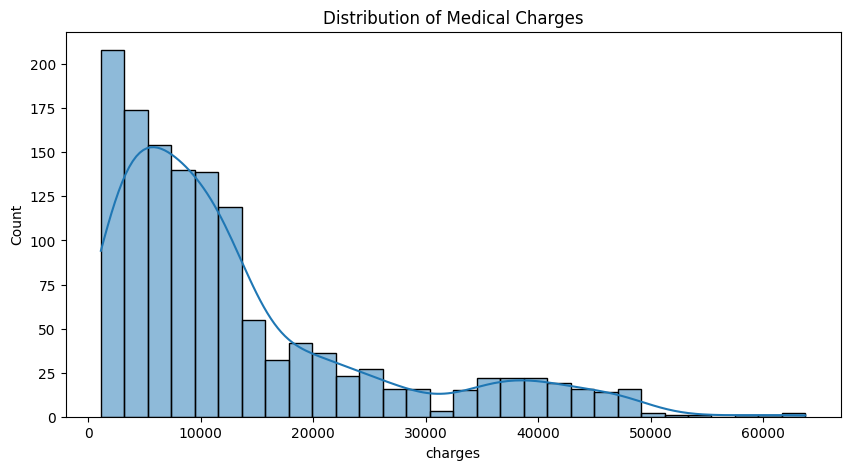

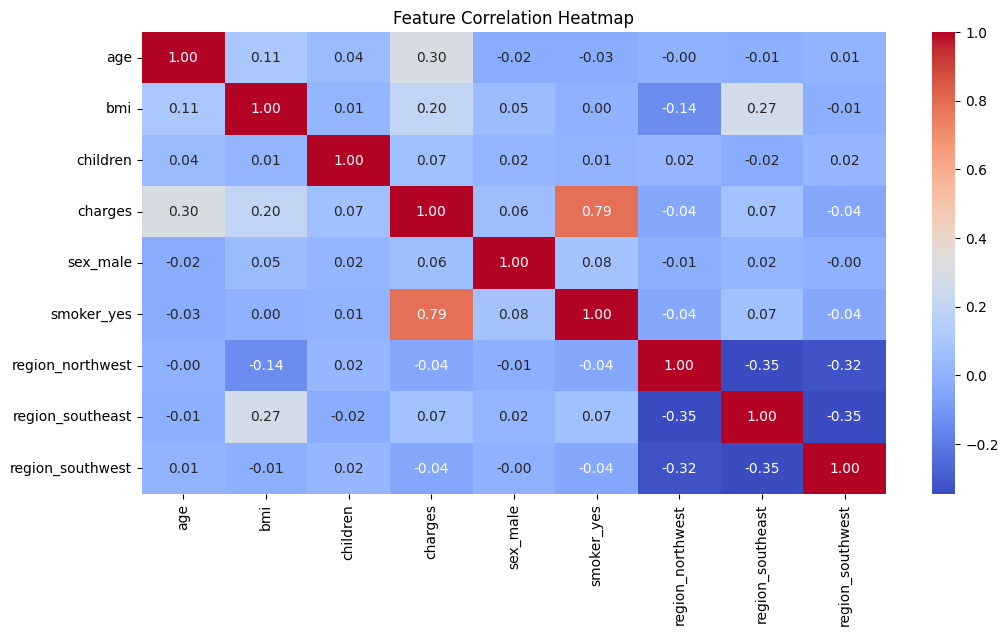

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Step 7: Correlation Heatmap**

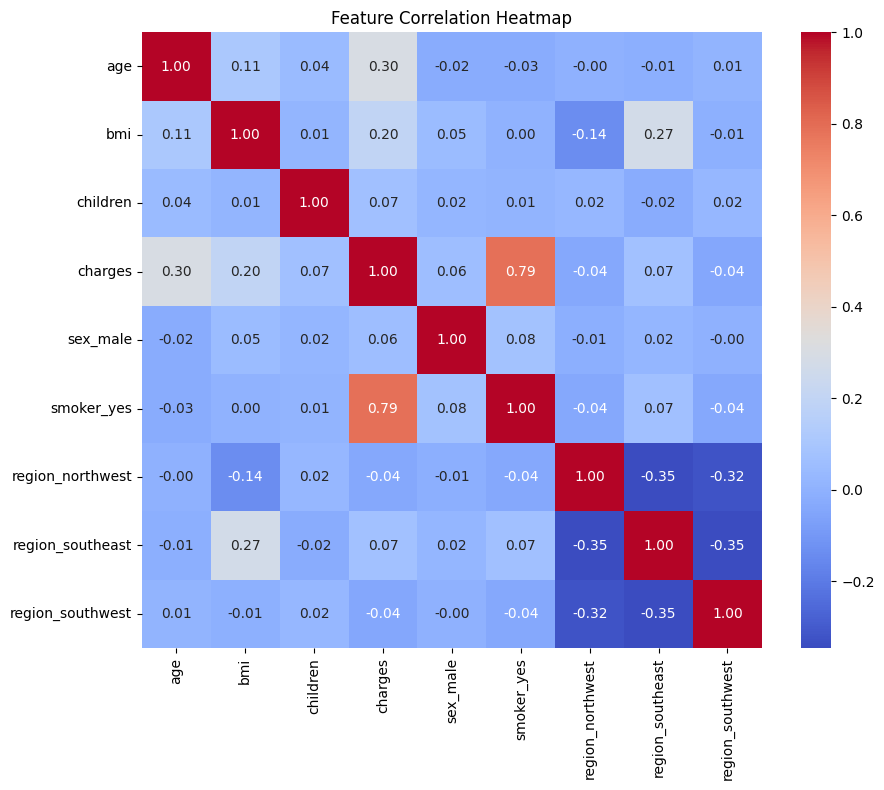

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().fillna(0), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Train and Optimize Three Models**

```
(a) Linear Regression (Using Gradient Descent)
Perform hyperparameter tuning using GridSearchCV on SGDRegressor.

```



In [8]:
param_grid_lr = {'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [500, 1000, 5000]}
lr_grid_search = GridSearchCV(SGDRegressor(), param_grid_lr, cv=5, scoring='neg_mean_squared_error', verbose=1)
lr_grid_search.fit(X_train, y_train)
best_lr = lr_grid_search.best_estimator_
print(f"Best Linear Regression params: {lr_grid_search.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Linear Regression params: {'alpha': 0.01, 'max_iter': 500}


`Plot Loss Curve for Linear Regression`

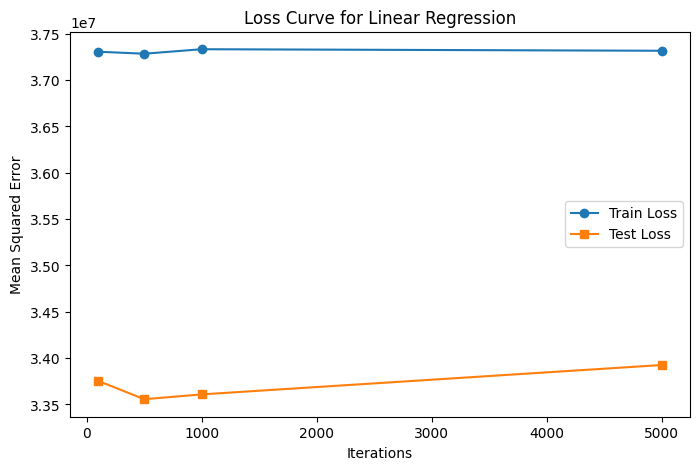

In [9]:
train_loss = []
test_loss = []

for max_iter in [100, 500, 1000, 5000]:
    model = SGDRegressor(max_iter=max_iter, alpha=lr_grid_search.best_params_['alpha'])
    model.fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(8, 5))
plt.plot([100, 500, 1000, 5000], train_loss, marker='o', label='Train Loss')
plt.plot([100, 500, 1000, 5000], test_loss, marker='s', label='Test Loss')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve for Linear Regression")
plt.legend()
plt.show()

**(b) Decision Tree Regression**
`Perform hyperparameter tuning on DecisionTreeRegressor.`

In [10]:
param_grid_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error', verbose=1)
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_
print(f"Best Decision Tree params: {dt_grid_search.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Decision Tree params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}


**(c) Random Forest Regression**
`Perform hyperparameter tuning on RandomForestRegressor.`

In [11]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
print(f"Best Random Forest parameters: {rf_grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


**Step8: Model Evaluation**
```
(Finding the Best Model)
Compute Mean Squared Error (MSE) for all three models.
Select the model with the lowest MSE.

```



In [12]:
mse_lr = mean_squared_error(y_test, best_lr.predict(X_test))
mse_dt = mean_squared_error(y_test, best_dt.predict(X_test))
mse_rf = mean_squared_error(y_test, best_rf.predict(X_test))

best_model = min([(mse_lr, best_lr, "Linear Regression"), (mse_dt, best_dt, "Decision Tree"), (mse_rf, best_rf, "Random Forest")], key=lambda x: x[0])
print(f"Best model: {best_model[2]} with MSE: {best_model[0]}")


Best model: Random Forest with MSE: 18876913.591809865


**Step9: Save the Best Model**
`Store the model using joblib so it can be used for predictions later.`

In [13]:
joblib.dump(best_model[1], "best_health_model.pkl")

['best_health_model.pkl']

**Step 10: Visualizing Model Performance**

C:\Users\Kalivan\AppData\Local\Temp\ipykernel_10128\3231860773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette="viridis")


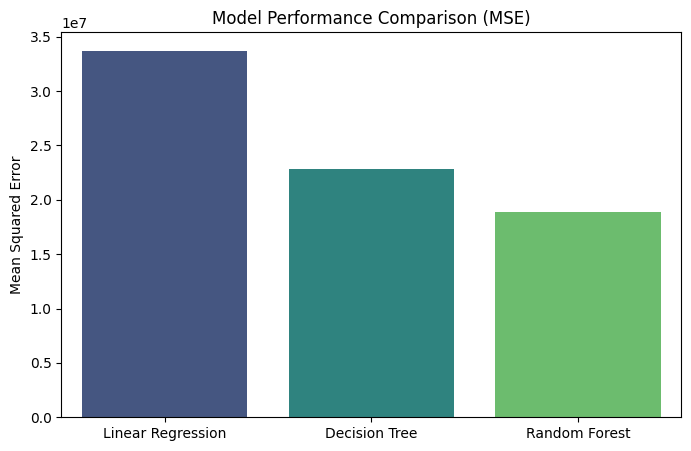

In [14]:
models = ["Linear Regression", "Decision Tree", "Random Forest"]
mse_values = [mse_lr, mse_dt, mse_rf]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mse_values, palette="viridis")
plt.title("Model Performance Comparison (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()

**Step 11: Load and Predict**

In [15]:
loaded_model = joblib.load("best_health_model.pkl")
sample_input = np.array(X_test[0]).reshape(1, -1)
prediction = loaded_model.predict(sample_input)
print(f"Predicted medical charge: {prediction[0]}")

Predicted medical charge: 9948.197264401068


# **In summary,  of the process!**

First, we bring in all the necessary tools (libraries) to work with. Then, we load the data from a CSV file and take a quick look at it to understand what we’re working with. Next, we get the data ready by turning any categories into numbers and splitting it into training and testing sets. To make sure our models work well, we scale the features, so everything is on the same level.

We then take a closer look at the data with visualizations like histograms and heatmaps. After that, we train a few models like Linear Regression, Decision Trees, and Random Forests, tuning them for the best performance. Once we compare how they perform with Mean Squared Error (MSE), we pick the best one.

The top model gets saved using joblib, so we can use it later. Finally, we load the model and predict medical charges, comparing how well each model did.

This whole process helps us build, test, and use a powerful predictive model!